<h1> Notebook 2 - Evaluar un modelo de Regresión Lineal</h1>

<p> En este notebook, preguntamos:</p>
<b>- ¿Qué es una regresión lineal?<br>
- ¿Cómo se entrena un modelo de regresión lineal?<br>
- ¿Cómo se interpreta y evalua un modelo de regresión lineal?<br>
- ¿Cuáles son las metricas que permiten evaluar un modelo de regresión lineal?<br>
- ¿Cómo elegir los atributos (<i>features</i>) de un modelo de regresión?<br></b>

Aprovechamos de este notebook para descubrir las librerías seaborn (visualización de datos) y scikit-learn (Machine Learning).

<h2>0. Recordatorio </h2>

Existen 2 categorías de algoritmo de aprendizaje supervisado:<br>
- <b>regresión</b>: aprendizaje de un modelo que tiene como <i>output</i> una variable <b>continua</b>,<br>
- <b>clasificación</b>: aprendizaje de un modelo que tiene como <i>output</i> una variable <b>discreta</b>.


<h2> 1. Regresión Lineal: Predicir un volumen de negocio según el canal de comunicación utilizado.</h2>

Tenemos un dataset de 200 observaciones, correspondiendo a productos. Cada producto tiene 4 características:<br>
- "TV": dinero invertido en publicidades en la televisión por cada producto (x1000). <br>
- "Radio": dinero invertido en publicidades en la radio por cada producto (x1000). <br>
- "Newspaper": dinero invertido en publicidades en la diarios por cada producto (x1000). <br>
- "Sales": númedo de productos vendidos (x1000 productos).<br>

<b>Problema</b>:<br>
Queremos establecer un modelo que permite predecir el volumen de productos vendidos a partir del presupuesto "publicidad". Queremos evaluar si este modelo es fiable o no.


In [1]:
import pandas as pd

data = pd.read_csv('nb2-advertising.csv', index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [2]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

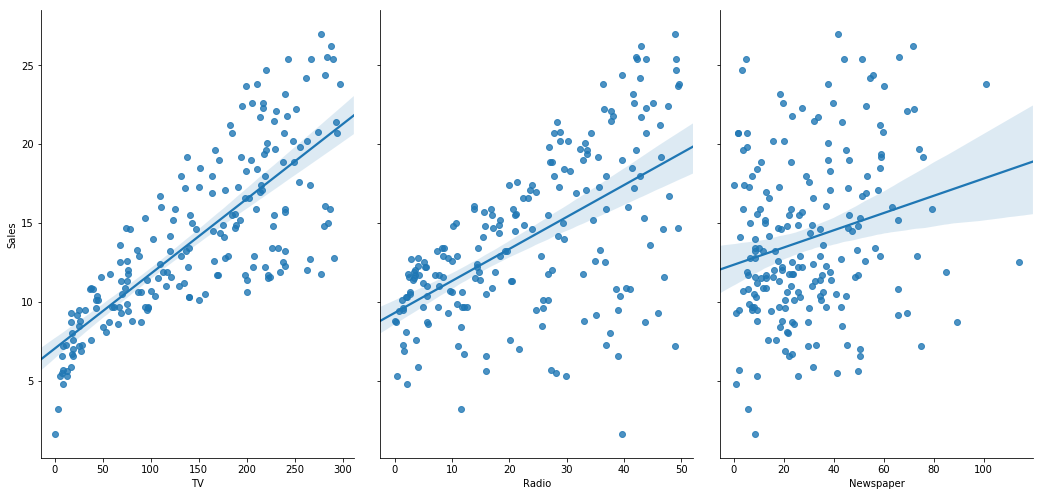

In [3]:
import warnings
warnings.filterwarnings('ignore')
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

## Linear regression

**Ventajas:** Rápido, no requiere afinación, altamente interpretable, bien entendido

**Desventajas:** es improbable que produzca la mejor precisión de predicción (supone una relación lineal entre las características y la respuesta)

### Forma de la regresión lineal

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ es la respuesta
- $\beta_0$ es el "intercept"
- $\beta_1$ es el coeficiente para $x_1$ (el primer <i>feature</i>)
- $\beta_n$ es el coeficiente para $x_n$ (el <i>feature</i> n)

En nuestro caso:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Los valores $\beta$ se denominan los **coeficientes del modelo**. Estos valores se "aprenden" durante el paso de ajuste del modelo utilizando el criterio de los "mínimos cuadrados". Entonces, el modelo ajustado puede ser usado para hacer predicciones!

## Preparar X e Y usando pandas

- scikit-learn espera que X (matriz de características) e y (vector de respuesta) sean matrices NumPy.
- Sin embargo, pandas se construye sobre NumPy.
- Así, X puede ser un pandas DataFrame e y puede ser un pandas Serie!

In [4]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do this in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [5]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [6]:
# select a Series from the DataFrame
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [7]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## Dividir X e Y en conjuntos de entrenamiento y pruebas

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [9]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## Regresión Lineal en scikit-learn

In [20]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpretación de los coeficientes del modelo

In [23]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [24]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.04656456787415029),
 ('Radio', 0.17915812245088839),
 ('Newspaper', 0.003450464711180378)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

¿Cómo interpretamos el coeficiente **TV** (0,0466)?

- Para una determinada cantidad de gastos de publicidad en radio y periódicos, **un aumento de "unidad" en el gasto de publicidad en televisión** se asocia con un aumento de **0,0466 "unidad" en las ventas**.
- O más claramente: Por una cantidad dada de gastos en anuncios de radio y periódicos, **un gasto adicional de $1,000 en anuncios de televisión** está asociado con un **incremento en las ventas de 46.6 artículos**.

Notas importantes:

- Esta es una declaración de **asociación**, no **causación**.
- Si un aumento en el gasto de anuncios de televisión se asociara con una **disminución** en las ventas, $\beta_1$ sería **negativo**.

### Realizar predicciones

In [26]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

In [27]:
y_pred

array([21.70910292, 16.41055243,  7.60955058, 17.80769552, 18.6146359 ,
       23.83573998, 16.32488681, 13.43225536,  9.17173403, 17.333853  ,
       14.44479482,  9.83511973, 17.18797614, 16.73086831, 15.05529391,
       15.61434433, 12.42541574, 17.17716376, 11.08827566, 18.00537501,
        9.28438889, 12.98458458,  8.79950614, 10.42382499, 11.3846456 ,
       14.98082512,  9.78853268, 19.39643187, 18.18099936, 17.12807566,
       21.54670213, 14.69809481, 16.24641438, 12.32114579, 19.92422501,
       15.32498602, 13.88726522, 10.03162255, 20.93105915,  7.44936831,
        3.64695761,  7.22020178,  5.9962782 , 18.43381853,  8.39408045,
       14.08371047, 15.02195699, 20.35836418, 20.57036347, 19.60636679])

Necesitamos una **métrica de evaluación** para comparar nuestras predicciones con los valores reales!

## Métricas de evaluación de modelos para regresión

Las métricas de evaluación para problemas de clasificación, como **exactitud**, no son útiles para problemas de regresión. En cambio, necesitamos métricas de evaluación diseñadas para comparar valores continuos.

Vamos a crear algunos ejemplos de predicciones numéricas, y calcular **tres métricas de evaluación comunes** para problemas de regresión:


In [28]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

**Mean Absolute Error** (MAE) es la media del valor absoluto de los errores:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [29]:
# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))

10.0
10.0


**Mean Squared Error** (MSE) es la media de los errores cuadrados:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [31]:
# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

150.0
150.0


**Root Mean Squared Error** (RMSE)  es la raíz cuadrada de la media de los errores cuadrados:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [32]:
# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comparando estas métricas:

- **MAE** es el más fácil de entender, porque es el error promedio.
- **MSE** es más popular que MAE, porque MSE "castiga" errores más grandes.
- **RMSE** es aún más popular que MSE, porque RMSE es interpretable en las unidades "y".

## Calculando el RMSE para nuestras predicciones de ventas

In [51]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.404651423032895


In [52]:
linreg.score(X_train,y_train)

0.890307557755665

## Feature selection (Selección de características)

¿El **Newspaper** "pertenece" a nuestro modelo? En otras palabras, ¿mejora la calidad de nuestras predicciones?

Saquémoslo del modelo y revisemos el RMSE!

In [20]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3879034699382886


El RMSE **disminuyó** cuando quitamos el Newspaper del modelo. (El error es algo que queremos minimizar, así que **un número menor de RMSE es mejor**.) Por lo tanto, es poco probable que esta característica sea útil para predecir las ventas, y debería ser eliminada del modelo.

<h2>2. Trabajo práctico y preguntas</h2>

- ¿Cuál es el RMSE de los modelos de regresión realizados en el notebook 1?
- ¿Cuáles son las principales limites de un modelo de regresión lineal?
- ¿Cuál es la diferencia entre las relaciones de "corelaciones" y "causalidad"? ¿Por qué es importante tener conciencia de la diferencia?

<h2>Recursos</h2>

- In-depth introduction to machine learning in 15 hours of expert videos: https://www.dataschool.io/15-hours-of-expert-machine-learning-videos/
- Aplicar e interpretar linear regresión: https://www.dataschool.io/applying-and-interpreting-linear-regression/
- Tutorial oficial Seaborn: http://seaborn.pydata.org/tutorial.html